In [3]:
import pandas as pd
df=pd.read_csv(r"E:\STIP TASKS\train.csv",usecols=[
                                                   "region",
                                                   "no_of_trainings",
                                                   "age",
                                                   "previous_year_rating",
                                                   "length_of_service",
                                                   "KPIs_met >80%",
                                                   "avg_training_score",
                                                    "is_promoted"
                                                   

])
df

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score,is_promoted
0,region_7,1,35,5.0,8,1,49,0
1,region_22,1,30,5.0,4,0,60,0
2,region_19,1,34,3.0,7,0,50,0
3,region_23,2,39,1.0,10,0,50,0
4,region_26,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...
54803,region_14,1,48,3.0,17,0,78,0
54804,region_27,1,37,2.0,6,0,56,0
54805,region_1,1,27,5.0,3,1,79,0
54806,region_9,1,29,1.0,2,0,45,0


In [4]:
x=df.rename(columns={"region":"region_no"})

In [5]:
x.isnull().sum()

region_no                  0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
avg_training_score         0
is_promoted                0
dtype: int64

In [6]:
import numpy as np
x1=x.replace(" ",np.NaN)

In [8]:
data=x1.fillna(method="bfill")
data

,region_no,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score,is_promoted
0,region_7,1,35,5.0,8,1,49,0
1,region_22,1,30,5.0,4,0,60,0
2,region_19,1,34,3.0,7,0,50,0
3,region_23,2,39,1.0,10,0,50,0
4,region_26,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...
54803,region_14,1,48,3.0,17,0,78,0
54804,region_27,1,37,2.0,6,0,56,0
54805,region_1,1,27,5.0,3,1,79,0
54806,region_9,1,29,1.0,2,0,45,0


In [9]:
data.isnull().sum()

region_no               0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
avg_training_score      0
is_promoted             0
dtype: int64

([<matplotlib.axis.XTick at 0x200f39c66c8>,
 <a list of 5 Text major ticklabel objects>)

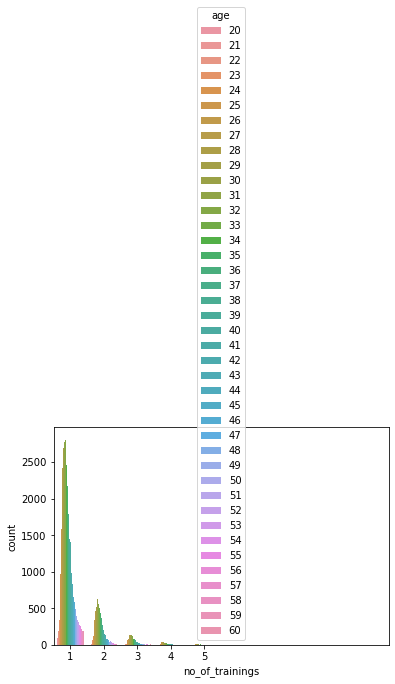

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="no_of_trainings",hue="age",data=data)
plt.xticks([0,1,2,3,4])


In [ ]:
#30-35 years age persons are more and got one time training 

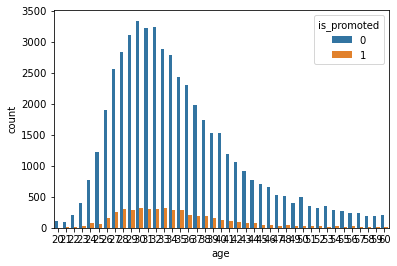

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="age",hue="is_promoted",data=data)



In [ ]:
#most of the 30-35 years age persons didn't promoted

In [34]:
x_data=data.iloc[:,0:8]
y_data=data.iloc[:,7]


In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x_data["region_no"]=le.fit_transform(x_data["region_no"])
x_data

,region_no,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score,is_promoted
0,31,1,35,5.0,8,1,49,0
1,14,1,30,5.0,4,0,60,0
2,10,1,34,3.0,7,0,50,0
3,15,2,39,1.0,10,0,50,0
4,18,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...
54803,5,1,48,3.0,17,0,78,0
54804,19,1,37,2.0,6,0,56,0
54805,0,1,27,5.0,3,1,79,0
54806,33,1,29,1.0,2,0,45,0


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,train_size=0.7)

In [39]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=15)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
training_pred=model.predict(x_train)
testing_pred=model.predict(x_test)

In [45]:
from sklearn.metrics import *
print("training_accuracy:",accuracy_score(training_pred,y_train))
print("testing_accuracy:",accuracy_score(testing_pred,y_test))

training_accuracy: 1.0
testing_accuracy: 1.0


In [51]:
print("training_confusion_matrix:\n",confusion_matrix(training_pred,y_train))
print("testing_confusion_matrix:\n",confusion_matrix(testing_pred,y_test))

training_confusion_matrix:
 [[35057     0]
 [    0  3308]]
testing_confusion_matrix:
 [[15083     0]
 [    0  1360]]


In [52]:
print("trainig_classification_report:\n",classification_report(training_pred,y_train))
print("testing_classification_report:\n",classification_report(testing_pred,y_test))

trainig_classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     35057
           1       1.00      1.00      1.00      3308

    accuracy                           1.00     38365
   macro avg       1.00      1.00      1.00     38365
weighted avg       1.00      1.00      1.00     38365

testing_classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15083
           1       1.00      1.00      1.00      1360

    accuracy                           1.00     16443
   macro avg       1.00      1.00      1.00     16443
weighted avg       1.00      1.00      1.00     16443

